<a href="https://colab.research.google.com/github/ShaunakSen/Data-Science-and-Machine-Learning/blob/master/Clustering_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using UMAP for Clustering

[link](https://umap-learn.readthedocs.io/en/latest/clustering.html)

UMAP can be used as an effective preprocessing step to boost the performance of density based clustering. UMAP, like t-SNE, can also create tears in clusters that are not actually present, resulting in a finer clustering than is necessarily present in the data. Despite these concerns there are still valid reasons to use UMAP as a preprocessing step for clustering. As with any clustering approach one will want to do some exploration and evaluation of the clusters that come out to try to validate them if possible.

First we’ll need a selection of libraries loaded up. Obviously we’ll need data, and we can use sklearn’s fetch_mldata to get it. We’ll also need the usual tools of numpy, and plotting. Next we’ll need umap, and some clustering options. Finally, since we’ll be working with labeled data, we can make use of strong cluster evaluation metrics Adjusted Rand Index and Adjusted Mutual Information.

### Rand Index

[link](https://davetang.org/muse/2017/09/21/the-rand-index/)

![](https://s0.wp.com/latex.php?latex=R+%3D+%5Cfrac%7Ba+%2B+b%7D%7B+%7B%7Bn%7D%5Cchoose%7B2%7D%7D+%7D+&bg=ffffff&fg=000&s=0)

The a  in the formula refers to the number of times a pair of elements belongs to a same cluster across two different clustering results and the b  refers to the number of times a pair of elements are in different clusters across two different clustering results. 

Say we have a set of six elements: {a, b, c, d, e, f}. Clustering method 1 (CM1) forms three clusters; the first two items are in group 1, the third and fourth are in group 2, and the fifth and sixth are in group 3: {1, 1, 2, 2, 3, 3}. Clustering method 2 (CM2) forms two clusters; the first three items are in group 1 and the last three items are in group 2: {1, 1, 1, 2, 2, 2}. What’s the Rand index of these two clustering results?

To manually calculate the Rand index, we need to go through every unordered pair to work out a  and b ; let’s work out a  first. There are 15 unordered pairs in a set of six elements: {a, b}, {a, c}, {a, d}, {a, e}, {a, f}, {b, c}, {b, d}, {b, e}, {b, f}, {c, d}, {c, e}, {c, f}, {d, e}, {d, f}, and {e, f}. a  is every time a pair of elements is grouped together by the two clustering methods. {a, b} and {e, f} are clustered together by CM1 and CM2, so a  = 2. b  is every time a pair of elements is not grouped together by the two clustering methods. {a, d}, {a, e}, {a, f}, {b, d}, {b, e}, {b, f}, {c, e}, and {c, f} are not clustered together by CM1 and CM2, so b  = 8. a  and b  are the times that both clustering methods agree. Therefore, the Rand index is:


![](https://s0.wp.com/latex.php?latex=R+%3D+%5Cfrac%7B2+%2B+8%7D%7B+%7B%7B6%7D%5Cchoose%7B2%7D%7D%7D+%3D+%5Cfrac%7B10%7D%7B15%7D+%3D+0.667+&bg=ffffff&fg=000&s=0)

In [0]:
!pip install hdbscan

     |████████████████████████████████| 4.9MB 9.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.23-cp36-cp36m-linux_x86_64.whl size=2332155 sha256=0274d90061122aea0b6aeea66e4d46a6653ce0e3678d026cee3eb25da5094194
  Stored in directory: /root/.cache/pip/wheels/1e/2a/69/0cdd5414624312666718f7526b0ab39cad65cea1c1b3892768
Successfully built hdbscan


In [0]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score



Now let’s set up the plotting and grab the data we’ll be using – in this case the MNIST handwritten digits dataset. MNIST consists of 28x28 pixel grayscale images of handwritten digits (0 through 9). These can be unraveled such that each digit is described by a 784 dimensional vector (the gray scale value of each pixel in the image). Ideally we would like the clustering to recover the digit structure.

In [12]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
mnist = fetch_openml(name='mnist_784')

print (mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


For visualization purposes we can reduce the data to 2-dimensions using UMAP. When we cluster the data in high dimensions we can visualize the result of that clustering. First, however, we’ll view the data a colored by the digit that each data point represents – we’ll use a different color for each digit. This will help frame what follows.



In [0]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(mnist.data)

In [15]:
standard_embedding.shape

(70000, 2)

In [19]:
standard_embedding[0]

array([ 0.5853949, -1.1981778], dtype=float32)

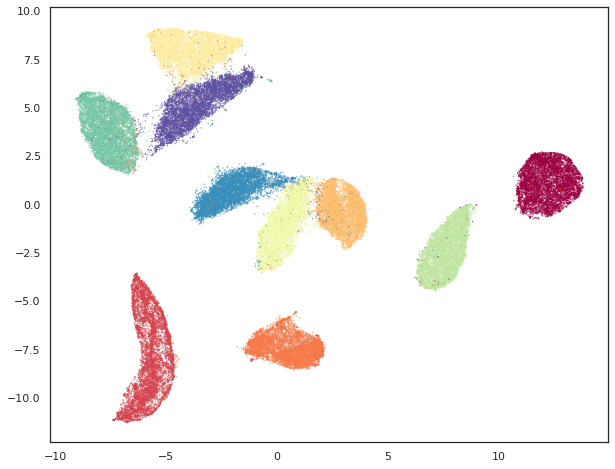

In [21]:
plt.scatter(x=standard_embedding[:,0], y=standard_embedding[:,1], c=mnist.target.astype('int'), s=0.1, cmap='Spectral');